In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train', 'test', 'sample_submission.csv']


In [2]:
!pwd

/kaggle/working


In [3]:
os.chdir('..')
os.listdir()

['working', 'lib', 'src', 'input']

In [4]:
import os, shutil

#Eğitilecek veri seti
original_dataset_dir = 'input/train'
#Modelleri kaydetmek için
base_dir = 'pens_and_books_small'
os.mkdir(base_dir)

#Veri train,test ve validation şeklinde bölündü.
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_pens_dir = os.path.join(train_dir, 'pens')
os.mkdir(train_pens_dir)


train_books_dir = os.path.join(train_dir, 'books')
os.mkdir(train_books_dir)


validation_pens_dir = os.path.join(validation_dir, 'pens')
os.mkdir(validation_pens_dir)


validation_books_dir = os.path.join(validation_dir, 'books')
os.mkdir(validation_books_dir)


test_pens_dir = os.path.join(test_dir, 'pens')
os.mkdir(test_pens_dir)


test_books_dir = os.path.join(test_dir, 'books')
os.mkdir(test_books_dir)

# 70 kalem resmi train_pens_dir kopyalandı.
fnames = ['kalem.{}.jpg'.format(i) for i in range(70)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_pens_dir, fname)
    shutil.copyfile(src, dst)

# 30 kalem resmi validation_pens_dir kopyalandı.
fnames = ['kalem.{}.jpg'.format(i) for i in range(70, 100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_pens_dir, fname)
    shutil.copyfile(src, dst)
    
# 50 kalem resmi test_pens_dir kopyalandı.
fnames = ['kalem.{}.jpg'.format(i) for i in range(0, 50)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_pens_dir, fname)
    shutil.copyfile(src, dst)
    
# # 70 kitap resmi train_books_dir kopyalandı.
fnames = ['kitap.{}.jpg'.format(i) for i in range(70)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_books_dir, fname)
    shutil.copyfile(src, dst)
    
# # 30 kitap resmi validation_books_dir kopyalandı.
fnames = ['kitap.{}.jpg'.format(i) for i in range(70, 100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_books_dir, fname)
    shutil.copyfile(src, dst)
    
# # 50 kitap resmi test_books_dir kopyalandı.
fnames = ['kitap.{}.jpg'.format(i) for i in range(0, 50)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_books_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
print('Total training pen images:', len(os.listdir(train_pens_dir)))

Total training pen images: 70


In [6]:
print('Total training book images:', len(os.listdir(train_books_dir)))

Total training book images: 70


In [7]:
print('Total validation pen images: ', len(os.listdir(validation_pens_dir)))

Total validation pen images:  30


In [8]:
print('Total validation book images: ', len(os.listdir(validation_books_dir)))

Total validation book images:  30


In [9]:
print('Total test pen images:', len(os.listdir(test_pens_dir)))

Total test pen images: 50


In [10]:
print('Total test book images:', len(os.listdir(test_books_dir)))


Total test book images: 50


Şimdi jpg dosyalarının olduğu 140 train (70 kalem, 70 kitap), 60 validation (30 kalem, 30 kitap) ve test 100 (50 kalem, 50 kitap) şeklinde veriler olan, iki sınıflı bir derin öğrenme problemi vardır. Bu resim sınıflandırma problemi CNN ve Maxpooling katmanları ile çözülecektir.


In [11]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


Modelimizin giriş katmanları için aktivasyon fonksiyonu olarak "relu" seçilmiştir.Verimiz iki sınıftan oluştuğu için çıkış katmanı aktivasyonu binary classficationa uygun olarak "sigmoid" olarak belirlenmiştir.Flatten ile vektörel dönüşüm tamamlanır.Verilerin boyutu 300x300 ve renkli olduğunu belirtmek için 3 kanallı tensörler şeklinde input_shape belirlenir.

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 170528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                10913856  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total para

Optimizer, loss fonksiyonu ve başarım metriği seçimi

In [13]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

Resimlerin normalize edilmesi, boyutlarının ayarlanması ya da DÖ’nin kabul edebileceği tensör’ler haline getirilmesi.

Optimizer, loss fonksiyonu ve başarım metriği seçimi.

In [14]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (300, 300),
                    batch_size = 10,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size = (300, 300),
                        batch_size = 10,
                        class_mode = 'binary')

Found 140 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


10’luk bacth’ler halinde, 300*300 boyutlu, 3 kanallı tensörler ve 10’luk sınıf vektörü görülmektedir.

In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 300, 300, 3)
labels batch shape: (10,)


Model eğitimi

In [16]:
history = model.fit_generator(
                train_generator,
                steps_per_epoch = 6,
                epochs = 6,
                validation_data = validation_generator,
                validation_steps = 3)

Instructions for updating:
Use tf.cast instead.
Epoch 1/6
6/6 [==============================] - 7s 1s/step - loss: 1.1481 - acc: 0.5500 - val_loss: 0.6884 - val_acc: 0.4333
Epoch 2/6
6/6 [==============================] - 5s 753ms/step - loss: 0.6684 - acc: 0.5667 - val_loss: 0.8089 - val_acc: 0.4000
Epoch 3/6
6/6 [==============================] - 4s 683ms/step - loss: 0.6767 - acc: 0.5500 - val_loss: 0.6921 - val_acc: 0.4000
Epoch 4/6
6/6 [==============================] - 4s 602ms/step - loss: 0.5812 - acc: 0.7333 - val_loss: 0.7260 - val_acc: 0.4000
Epoch 5/6
6/6 [==============================] - 4s 595ms/step - loss: 0.6835 - acc: 0.6000 - val_loss: 0.5439 - val_acc: 0.8667
Epoch 6/6
6/6 [==============================] - 4s 600ms/step - loss: 0.5461 - acc: 0.8667 - val_loss: 0.5284 - val_acc: 0.6333


Modelin saklanması

In [17]:
model.save('pens_and_books_model_v1.h5')

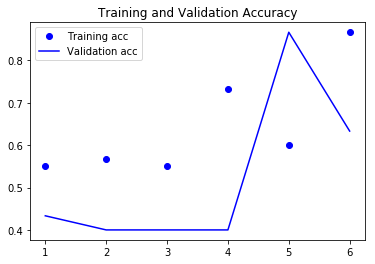

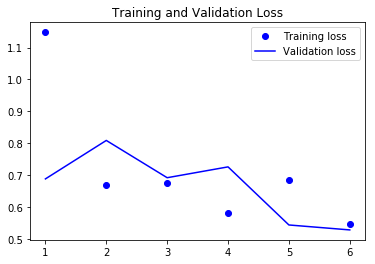

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


Veri setinin küçük olmasına bağlı eğrilerden anlaşılacagı ve acc,loss sonuçlarına bağlı olarak modelin başarımı düşüktür ve overfit olma riski vardır.Bu yüzden sırasıyla 

1.Epoch

2.Dropout

3.Ağırlık regülarizasyonu

4.Data Augmentation
yöntemlerini kullanarak,ayrıca katman sayıları ile oynanarak acc arttırılmaya ve loss azaltırılmaya çalışılıp overfitting olması engellenmeye çalışılacaktır.

In [19]:
from keras import regularizers
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Katman sayısı arttırılarak model eğitime hazır hale getirilmiştir.

1.Model eğitimi için epoch arttırılmıştır.

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (300, 300),
                    batch_size = 10,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size = (300, 300),
                        batch_size = 10,
                        class_mode = 'binary')
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=3)

Found 140 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/15
20/20 [==============================] - 13s 652ms/step - loss: 0.6857 - acc: 0.6500 - val_loss: 0.4291 - val_acc: 0.9000
Epoch 2/15
20/20 [==============================] - 10s 483ms/step - loss: 0.4033 - acc: 0.8550 - val_loss: 0.2397 - val_acc: 0.9667
Epoch 3/15
20/20 [==============================] - 10s 491ms/step - loss: 0.3059 - acc: 0.8850 - val_loss: 0.2696 - val_acc: 0.8667
Epoch 4/15
20/20 [==============================] - 10s 512ms/step - loss: 0.2689 - acc: 0.9050 - val_loss: 0.2532 - val_acc: 0.9000
Epoch 5/15
20/20 [==============================] - 11s 534ms/step - loss: 0.1962 - acc: 0.9150 - val_loss: 0.1246 - val_acc: 0.9333
Epoch 6/15
20/20 [==============================] - 10s 487ms/step - loss: 0.1147 - acc: 0.9600 - val_loss: 0.0522 - val_acc: 1.0000
Epoch 7/15
20/20 [==============================] - 10s 486ms/step - loss: 0.1189 - acc: 0.9650 - val_loss: 0.0693 - val_

Model epoch sayısındaki artış sayesinde  acc değerini arttırıp loss fonksiyonunu azaltmıştır.Her adımdaki epoch sayıları train/batch size formülü ile bir değer verilmiştir.Epoch sayısı ise tüm veriler/step_per_epoch sayısı formülü ile belirlenmiştir.Validation_steps ise validation verisi/batch size formülü ile belirlenmiştir.

accuracy ve loss fonksiyonu eğrileri

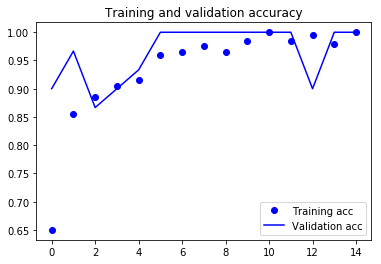

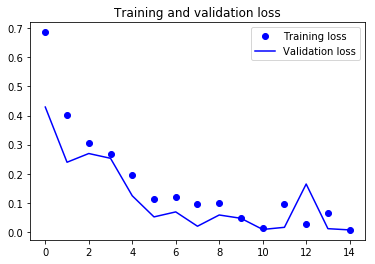

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

2.Dropout

Bir katmanın çıkışlarının bir bölümünün train zamanında belli bir oranda sıfırlanması ile yapılan bir tür regülarizasyondur.

In [22]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (300, 300),
                    batch_size = 10,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size = (300, 300),
                        batch_size = 10,
                        class_mode = 'binary')
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=3)

Found 140 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/15
20/20 [==============================] - 13s 652ms/step - loss: 0.6166 - acc: 0.6450 - val_loss: 0.3658 - val_acc: 1.0000
Epoch 2/15
20/20 [==============================] - 10s 483ms/step - loss: 0.2954 - acc: 0.9000 - val_loss: 0.2753 - val_acc: 0.9000
Epoch 3/15
20/20 [==============================] - 11s 543ms/step - loss: 0.1297 - acc: 0.9750 - val_loss: 0.0588 - val_acc: 1.0000
Epoch 4/15
20/20 [==============================] - 10s 512ms/step - loss: 0.0807 - acc: 0.9750 - val_loss: 0.0265 - val_acc: 1.0000
Epoch 5/15
20/20 [==============================] - 11s 561ms/step - loss: 0.0693 - acc: 0.9850 - val_loss: 0.0294 - val_acc: 1.0000
Epoch 6/15
20/20 [==============================] - 10s 488ms/step - loss: 0.0750 - acc: 0.9750 - val_loss: 0.0134 - val_acc: 1.0000
Epoch 7/15
20/20 [==============================] - 10s 486ms/step - loss: 0.0184 - acc: 1.0000 - val_loss: 0.0053 - val_

accuracy ve loss fonksiyonu eğrileri

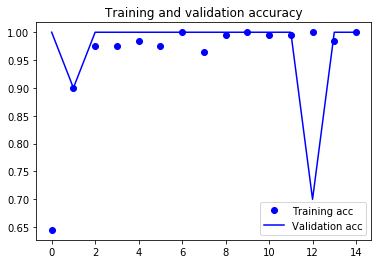

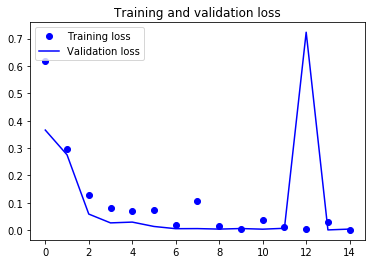

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Bu yaklaşım(dropout)ezberlemeyi engellemek için sisteme/ortama gürültü eklemek (veya düğümlerin bazılarını kapatmak!) gibi düşünülebilir.Eğrilerden de görüldüğü üzere bir önceki eğitimde acc si 1.00 olan model araya gürültü eklenmesiyle değer düşüşü yaşamıştır ve öğrenmesi engellenmiştir.

3.Ağırlık Regülarizasyonu

Keras’ta weight_regularization parametresi katmanlara “cost” olarak eklenerek overfitting’i düşürür.

In [25]:
from keras import regularizers
from keras.regularizers import l2
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3),kernel_regularizer=regularizers.l2(0.001),
                       activation = 'relu', input_shape = (300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3),kernel_regularizer=regularizers.l2(0.001),activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.001),activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.001),activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

l2(0.001) 'nin anlamı şudur; katmanın ağırlık matrisi içerisindeki her bir katsayı, ağın toplam kayıp değerine 0.001 * weight_coefficient_value*2 ceza değerini ekleyecektir. Bu ceza değeri sadece eğitim sürecinde ekleneceği için, kayıp değerleri eğitim sürecinde test sürecine göre çok daha büyük olacaktır.

In [26]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (300, 300),
                    batch_size = 10,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size = (300, 300),
                        batch_size = 10,
                        class_mode = 'binary')

history = model.fit_generator(
                train_generator,
                steps_per_epoch = 20,
                epochs = 15,
                validation_data = validation_generator,
                validation_steps = 3)

Found 140 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/15
20/20 [==============================] - 13s 662ms/step - loss: 0.7621 - acc: 0.6300 - val_loss: 0.7516 - val_acc: 0.4000
Epoch 2/15
20/20 [==============================] - 10s 482ms/step - loss: 0.5004 - acc: 0.8500 - val_loss: 0.4375 - val_acc: 0.7667
Epoch 3/15
20/20 [==============================] - 10s 489ms/step - loss: 0.3241 - acc: 0.9450 - val_loss: 0.2190 - val_acc: 1.0000
Epoch 4/15
20/20 [==============================] - 10s 489ms/step - loss: 0.2417 - acc: 0.9700 - val_loss: 0.2087 - val_acc: 1.0000
Epoch 5/15
20/20 [==============================] - 10s 510ms/step - loss: 0.1911 - acc: 0.9800 - val_loss: 0.2916 - val_acc: 0.9000
Epoch 6/15
20/20 [==============================] - 11s 546ms/step - loss: 0.2199 - acc: 0.9650 - val_loss: 0.1645 - val_acc: 1.0000
Epoch 7/15
20/20 [==============================] - 10s 490ms/step - loss: 0.1661 - acc: 0.9850 - val_loss: 0.1481 - val_

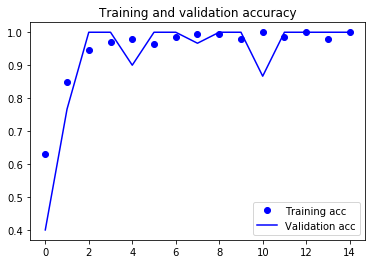

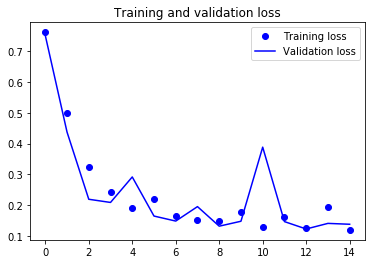

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Model yeni eklenen ağırlıklarla overfittinge daha dirençli hale geldi ve acc değerinde de artış yaşandı.

4.Data Augmentation

In [28]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Veri setinin küçük olması bir overfitting nedenidir. Bu bağlamda “augmentation” değişik transformasyonlar ile eldeki resimleri DÖ’nin ilk kez gördüğü resimler haline getirme işlemidir.

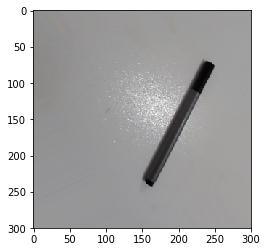

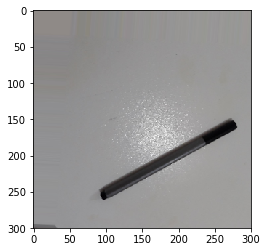

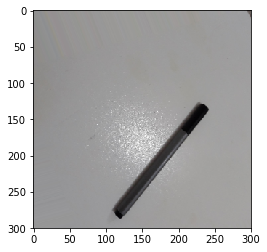

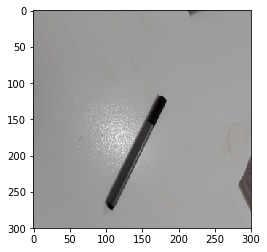

In [29]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

fnames = [os.path.join(train_pens_dir, fname) for fname in os.listdir(train_pens_dir)]

img_path = fnames[50]

img = image.load_img(img_path, target_size = (300, 300))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

Aynı kalem resminin augment edilmiş hali yukarıdadır.Şimdi modeli yeni verilerle eğiterek sonuçları karşılaştıralım.

In [30]:
from keras import regularizers
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [31]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=3)

Found 140 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/15
20/20 [==============================] - 16s 796ms/step - loss: 0.6301 - acc: 0.6100 - val_loss: 0.4429 - val_acc: 0.9667
Epoch 2/15
20/20 [==============================] - 14s 675ms/step - loss: 0.3939 - acc: 0.8500 - val_loss: 0.2336 - val_acc: 0.9333
Epoch 3/15
20/20 [==============================] - 13s 673ms/step - loss: 0.2901 - acc: 0.8900 - val_loss: 0.1747 - val_acc: 0.9000
Epoch 4/15
20/20 [==============================] - 13s 652ms/step - loss: 0.1616 - acc: 0.9500 - val_loss: 0.4931 - val_acc: 0.6667
Epoch 5/15
20/20 [==============================] - 14s 697ms/step - loss: 0.1047 - acc: 0.9800 - val_loss: 0.1630 - val_acc: 0.9333
Epoch 6/15
20/20 [==============================] - 13s 633ms/step - loss: 0.1472 - acc: 0.9450 - val_loss: 0.0173 - val_acc: 1.0000
Epoch 7/15
20/20 [==============================] - 13s 634ms/step - loss: 0.0853 - acc: 0.9800 - val_loss: 0.4632 - val_

In [32]:
model.save('pens_and_books_model_v2.h5')

Model version 2 saklanması

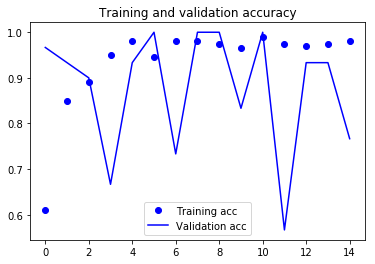

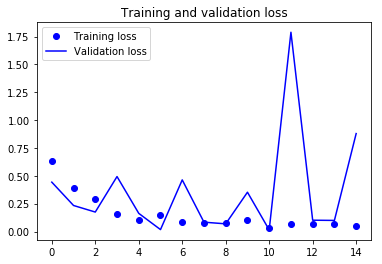

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Modelin veri yetersizliği yüzünden öğrenerek sürekli iyi sonuçlar vermesi engellendi yani veri çeşitliliği zenginleştirilip overfit olmaması sağlandı.